# This is an exploration/cleaning of the Chess Data Set found on Kaggle.com

I will be exploring this dataset with graphs and other tools taught from various sections of the python learning done. 

In [1]:
#import modules that will be helpful in our exploration
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import dataset

# Assign the filename: file
file = 'chess_games.csv'
# Read the file into a DataFrame: df
df = pd.read_csv(file)

In [2]:
print(df.shape)
df.head(1)

(20058, 17)


,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation


   # Using `df.head(1)` we see the first line of code. These include 17 different information columns and using `df.shape` we see there are 20,000 games within this dataset

In [3]:
# Rearrange the columns for easier reading

In [4]:
df = df[['game_id', 'winner','victory_status','rated','white_rating','black_rating','turns','time_increment','white_id', 'black_id','opening_code', 'opening_moves', 'opening_fullname','opening_shortname', 'opening_response', 'opening_variation','moves',]]
df.head(1)

,game_id,winner,victory_status,rated,white_rating,black_rating,turns,time_increment,white_id,black_id,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation,moves
0,1,White,Out of Time,False,1500,1191,13,15+2,bourgris,a-00,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...


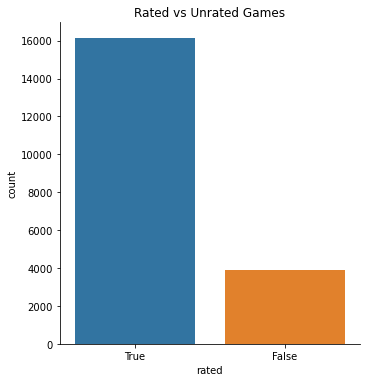

This shows that most games in this dataset are "Rated" Games


In [5]:
sns.catplot(x='rated',
           data=df,
           kind='count',
           order=[True,False])
plt.title('Rated vs Unrated Games')
plt.show()
print('This shows that most games in this dataset are "Rated" Games')

# We only care about rated games so lets remove all non-rated games

In [6]:
df = df[df.rated != False]

# We can also get rid of `time_increment` and `opening_code` 

In [7]:
df.drop('time_increment',axis=1,inplace=True)
df.drop('opening_code',axis=1,inplace=True)
df.head(3)

,game_id,winner,victory_status,rated,white_rating,black_rating,turns,white_id,black_id,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation,moves
1,2,Black,Resign,True,1322,1261,16,a-00,skinnerua,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2,3,White,Mate,True,1496,1500,61,ischia,a-00,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3,4,White,Mate,True,1439,1454,61,daniamurashov,adivanov2009,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...


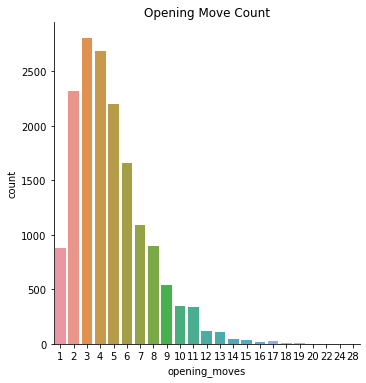

This count bar graph is designed to show the relationship between games where players followed the opening moves of a specific
variation of play.

As you can see, the vast majority of openings are only followed for < 10 moves before leaving
what are called "book moves"


In [8]:
sns.catplot(x=df.opening_moves,
           data=df,
           kind='count')
plt.title('Opening Move Count')
plt.show()
print('This count bar graph is designed to show the relationship between games where players followed the opening moves of a specific')
print('variation of play.')
print('')
print('As you can see, the vast majority of openings are only followed for < 10 moves before leaving')
print('what are called "book moves"')

# Lets try and create an 'upset' column
## based on the ratings of each player (white and black) we will find who is higher rated, and whether they won.

### We will need to define what the conditions of an upset are and use those to create a column

In [29]:
#We will use np.select for this job

conditions = [
    (df["black_rating"] < df['white_rating']) & (df['winner'] == 'Black'),
    (df["white_rating"] < df['black_rating']) & (df['winner'] == 'White')
]

choices = [True,True]

df['upset'] = np.select(conditions,choices,default=False)

False    10771
True      5384
Name: upsets, dtype: int64


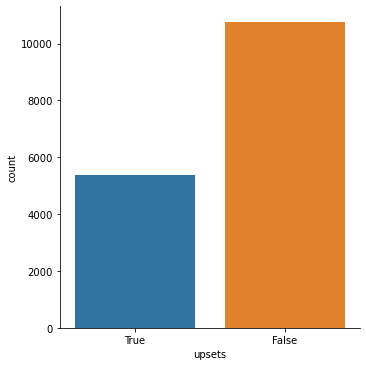

This just goes to show, it does not matter who your opponent is, 
you should always try your best!
1/3 of games are upsets in chess!


In [44]:
print(df.upsets.value_counts())
sns.catplot(x='upsets',
           data=df,
           kind='count',
           order=[True,False])
plt.show()
print('This just goes to show, it does not matter who your opponent is, ')
print('you should always try your best!')
print('1/3 of games are upsets in chess!')

Text(0, 0.5, 'Opening Name')

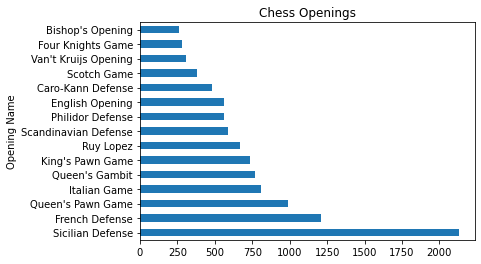

In [42]:
#Here we are going to group games by their opening

openings = df.groupby('opening_shortname')['game_id'].count().sort_values(ascending = False)

#graph the numbers of most played openings
openings.head(15).plot(kind = 'barh')
plt.title('Chess Openings')
plt.ylabel('Opening Name')

Text(0, 0.5, 'Opening Name')

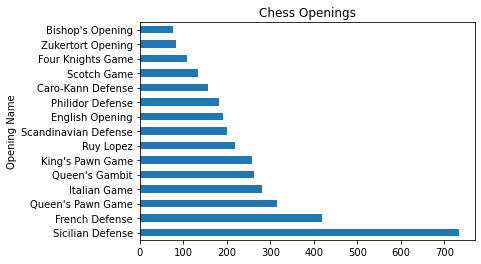

In [43]:
#let see if upsets have the same kind of graph

upsets = df[df.upsets == True]

openings = upsets.groupby('opening_shortname')['game_id'].count().sort_values(ascending = False)


#graph the numbers of most played openings
openings.head(15).plot(kind = 'barh')
plt.title('Chess Openings')
plt.ylabel('Opening Name')

# Looking at this graph, it seems the opening doesn't matter when it comes to an upset